In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
from functools import lru_cache
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

In [41]:
def process():
    def traj_path(i):
        return os.path.join('../nohup_output/mixed_nav_rf_rnd_edison_5_traj', f'trajectory_384153_{i}.npy')
    def save_path(i):
        return os.path.join('../nohup_output/mixed_nav_rf_rnd_edison_5_traj', f'trajectory_{i}')
    def num_outside(objs_pos):
        return np.sum(np.sum(np.square(objs_pos), axis=1) > 30 ** 2)
    
    num_grasped = -1
    for i in range(1, 202):
        traj = np.load(traj_path(i), allow_pickle=True)[()]
        new_blocks = OrderedDict()
        for t in sorted(traj['objects'].keys()):
            objs = traj['objects'][t]
            n = num_outside(objs)
            if n > num_grasped: 
                new_blocks[t] = objs
                num_grasped = n
        traj['objects'] = new_blocks
        np.save(save_path(i), traj)

process()

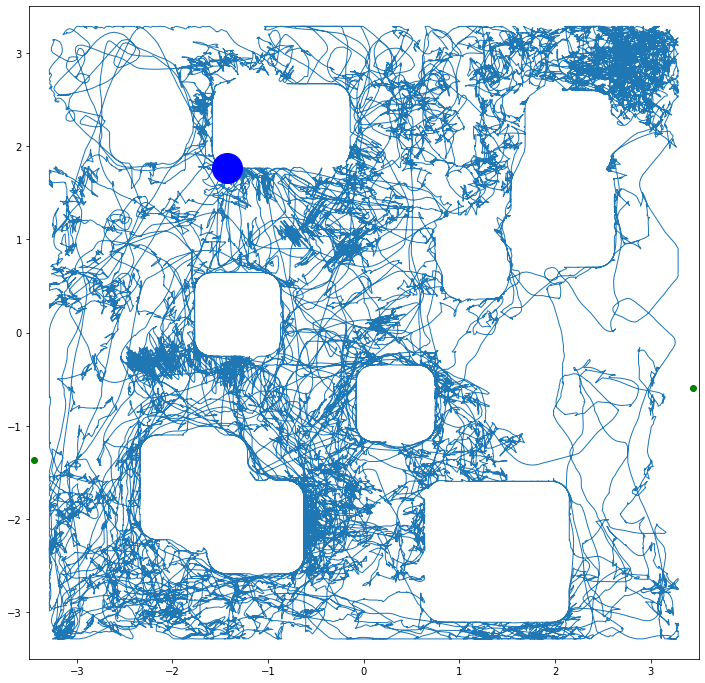

In [46]:
def traj_path(i):
    return os.path.join('../nohup_output/mixed_nav_rf_rnd_edison_5_traj', f'trajectory_{i}.npy')

path_len = 1000

lru_cache(maxsize=1000)
def traj(i):
    return np.load(traj_path(i), allow_pickle=True)[()]

def traj_base(i):
    return traj(i)['base']

def traj_objects(i):
    return traj(i)['objects']

def traj_range(t_start, t_end):
    i_start = t_start // path_len + 1
    i_end = t_end // path_len + 1
    path = np.vstack([traj_base(i) for i in range(i_start, i_end + 1)])
    t_start_offset = t_start % path_len
    return path[t_start_offset:t_start_offset + (t_end - t_start), :]

def traj_object_at(t):
    i = t // path_len + 1
    t = t % path_len
    objs = traj_objects(i)
    return objs.get(t, None)

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((-3.5, 3.5))

line, = ax.plot([], [], lw=1)
dot, = ax.plot([], [], marker='o', markersize=30, color="blue")
objs, = ax.plot([], [], marker='o', markersize=6, color="green", lw=0)

def init():
    line.set_data([], [])
    dot.set_data([0], [0])
    obj_pos = traj_object_at(0)
    objs.set_data(obj_pos[:, 0], obj_pos[:, 1])
    return line,

t_start = 0
t_end = 100000
t_step = 250
t_draw_step = 1

x = []
y = []

def animate(i):
    path = traj_range(i * t_step, (i + 1) * t_step)
    x.extend(path[::t_draw_step, 0].tolist())
    y.extend(path[::t_draw_step, 1].tolist())
    line.set_data(x, y)
    dot.set_data([x[-1]], [y[-1]])
    
    for t in range((i + 1) * t_step - 1, i * t_step - 1, -1):
        obj_pos = traj_object_at(t)
        if obj_pos is not None:
            objs.set_data(obj_pos[:, 0], obj_pos[:, 1])
            break
    
    return line,

import time

start = time.time()

# anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
anim = FuncAnimation(fig, animate, init_func=init, frames=t_end//t_step, interval=75, blit=True)
# HTML(anim.to_html5_video())
anim.save("../nohup_output/mixed_nav_rf_rnd_edison_5_traj.mp4")

15

In [21]:
a = OrderedDict()

In [22]:
a[1] = 2

In [23]:
a[4] = 3

In [24]:
a[9] = 4

In [25]:
a

OrderedDict([(1, 2), (4, 3), (9, 4)])